

# Project: Investigate a Dataset (Tmdb Movies Data Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, i am investigating **Tmdb Movies Data** with 10,000 movies collected from the database, i will be looking
at how different Generes of movies are affected by several featues like popularity, revenue etc.
i will use necessary summary statistics and great visuals to show important relationships and distributions.
    1.i will be looking into questions like what effect did revenue and budget have on popularity
    2.levels of vote counts that got the highest average revenue
    3.what genres are the oldest and others

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np



<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, i will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.I will also  make sure that i document my steps carefully and justify my cleaning decisions.

### General Properties

In [2]:
# load the tmdb  movies dataset
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()  #this prints out the first five rows or observations

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [5]:
#Show the dimension of the data set i.e rows and columns
# number of samples and  columns in each data set
movies_df.shape

(10866, 21)

>there are 10866 rows and 21 columns in this data set

In [7]:
#display the full information of the data set
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> the information above shows it that we have 10866 entries, but columns like production companies, genres, overview, keywords, tagline,director, homepage, cast have missing values.

In [40]:
# check for unique values in each column
movies_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
#check for the columns in my data set
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
# do summary statistics
# displays the count,mean, standard deviation(std), minimum value, maximum value, 25th percentile, 50th percentile,
# 75th percentile, and maximum value of each quantitative columns

movies_df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

> from the summary statistics, it shows that we have about 64% of popularity which is typically above average, the least year some movies were released was 1960, and the maximum year of release was 2015, the range between the minimum and maximum revenue also shows that  the revenue has been 
a whole lot in recent years

In [10]:
#check features with misssing values and the number of the missing values
movies_df.isnull().sum()

#cast, home

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> it is obvious the qualitative columns contain missing values,we will deal with that in the cleaning process

In [11]:
# check for duplicate rows 
movies_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [12]:
#check for  duplicate values
movies_df.duplicated().sum()

1

> we have just 1 duplicate

In [14]:
#unique values in each column
movies_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [15]:
#check the data types of the columns
movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning

>since the columns with missing values are strings, hence, i will get the mode of each and fill the missing values with
that mode

In [16]:
#what to fill null values with
movies_df.director.value_counts()

Woody Allen                 45
Clint Eastwood              34
Martin Scorsese             29
Steven Spielberg            29
Ridley Scott                23
                            ..
Jeffrey Porter               1
Larry Shaw                   1
Bill Pohlad                  1
Andy Hamilton|Guy Jenkin     1
Harold P. Warren             1
Name: director, Length: 5067, dtype: int64

In [17]:
#get mode of director column
mode_d = movies_df.director.mode()
mode_d

0    Woody Allen
dtype: object

In [18]:
#fill the misssing values with its mode
movies_df['director']=movies_df['director'].fillna(mode_d[0])

In [19]:
#what to fill null values  in cast column with with
movies_df.cast.value_counts()

Louis C.K.                                                                        6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei           5
Bill Burr                                                                         4
Aziz Ansari                                                                       3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                  3
                                                                                 ..
Ray Stevenson|Vincent D'Onofrio|Val Kilmer|Christopher Walken|Linda Cardellini    1
Freida Pinto|Riz Ahmed|Roshan Seth|Kalki Koechlin|Anurag Kashyap                  1
William Hurt|Paul Giamatti|James Woods|Billy Crudup|Topher Grace                  1
Dennis Quaid|Tony Oller|Aimee Teegarden|Stephen Lunsford|Devon Werkheiser         1
Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson          1
Name: cast, Length: 10719, dtype: int64

In [20]:
#get the mode of the cast column
mode_c = movies_df.cast.mode()
mode_c

0    Louis C.K.
dtype: object

In [21]:
#fill the missing value with the mode
movies_df['cast']=movies_df['cast'].fillna(mode_c[0])

In [22]:
#what to fill null values  in homepage column with with
movies_df.homepage.value_counts()

http://www.thehungergames.movie/              4
http://www.missionimpossible.com/             4
http://phantasm.com                           4
http://www.transformersmovie.com/             3
http://www.thehobbit.com/                     3
                                             ..
http://halo.xbox.com/en-us/halolegends        1
http://www.barneysversionthemovie.com/        1
http://frankieandalice.com/                   1
http://www.peoplevsgeorge.com                 1
http://en.wikipedia.org/wiki/Hooper_(film)    1
Name: homepage, Length: 2896, dtype: int64

In [23]:
#get the mode of the homepage column
mode_h = movies_df.homepage.mode()
mode_h

0                  http://phantasm.com
1    http://www.missionimpossible.com/
2     http://www.thehungergames.movie/
dtype: object

In [24]:
#fill the missing value with the mode
movies_df['homepage']=movies_df['homepage'].fillna(mode_h[0])

In [25]:
#get the mode of the tagline column
mode_t=movies_df.tagline.mode()
mode_t


0    Based on a true story.
dtype: object

In [26]:
#fill the tagline column with its mode
movies_df['tagline']=movies_df['tagline'].fillna(mode_t[0])

In [27]:
#get the mode of the keywords column
mode_k=movies_df.keywords.mode()
mode_k

0    woman director
dtype: object

In [28]:
#fill the keyword column with its mode
movies_df['keywords']=movies_df['keywords'].fillna(mode_k[0])

In [29]:
#get the mode of the overview column
mode_o= movies_df.overview.mode()
mode_o

0    No overview found.
dtype: object

In [30]:
#fill the overview column with its mode
movies_df['overview']=movies_df['overview'].fillna(mode_o[0])

In [31]:
#get the mode of the genres column
mode_g=movies_df.genres.mode()
mode_g


0    Comedy
1     Drama
dtype: object

In [32]:
#fill the genres colmn with its mode
movies_df['genres']=movies_df['genres'].fillna(mode_g[0])

In [33]:
#get the mode of the production_companies column
mode_p=movies_df.production_companies.mode()
mode_p

0    Paramount Pictures
dtype: object

In [34]:
#fill the production_companies with its mode
movies_df['production_companies']=movies_df['production_companies'].fillna(mode_p[0])

In [35]:
#get the mode of the imdb_id column
mode_i=movies_df['imdb_id'].mode()
mode_i

0    tt0411951
dtype: object

In [36]:
#fill the imdb column up with its mode
movies_df['imdb_id']=movies_df['imdb_id'].fillna(mode_i[0])

In [37]:
#check again for missing values
movies_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> now we do not have missing values again.
let us go on with doing further cleaning

In [38]:
#drop duplicates
movies_df.drop_duplicates(inplace= True)

In [39]:
#check again if there are still duplicates
movies_df.duplicated().sum()

0

In [41]:

movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [42]:
#change the data type of runtime from int to timestamp because it is appearing as an integer
movies_df['runtime']=movies_df['runtime'].astype('datetime64[ns]')

In [43]:
#comfirm if the datatype of runtime is changed
movies_df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                 datetime64[ns]
genres                          object
production_companies            object
release_date                    object
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [44]:
#dropping some of the columns i will not be using for analysis
movies_df.drop(['homepage','overview'], axis=1, inplace= True)

In [46]:
#comfirming if the columns have been dropped
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'tagline', 'keywords', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

> homepage and overview has been dropped

In [19]:

#define a custom function to return the difference between average revenues and budgets
def revenue_budget(average_difference):
    return movies_df['revenue'].mean() - movies_df['budget']


In [20]:
revenue_budget(movies_df['revenue'].mean()- movies_df['budget'])

0       -1.101767e+08
1       -1.101767e+08
2       -7.017668e+07
3       -1.601767e+08
4       -1.501767e+08
             ...     
10861    3.982332e+07
10862    3.982332e+07
10863    3.982332e+07
10864    3.982332e+07
10865    3.980432e+07
Name: budget, Length: 10866, dtype: float64

In [21]:
#using a for loop to iterate over the index and columns of the dataset
for i,v in enumerate(movies_df.columns):
    print(i,v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj
21 Vote count levels


### Exploratory Data Analysis

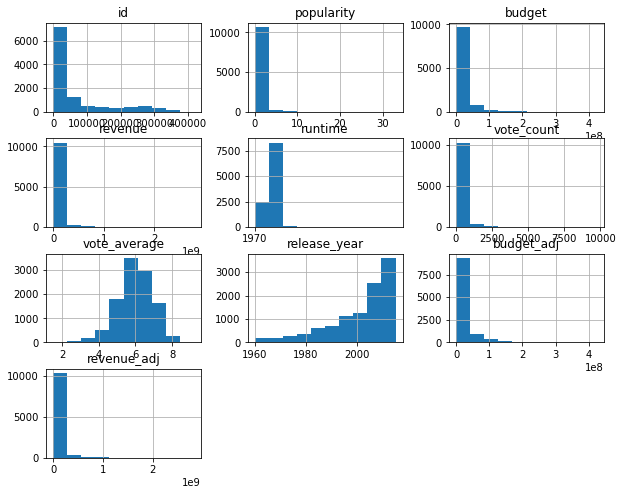

In [47]:
# distributions of each of the column just as what was gotten in the summary statistics
movies_df.hist(figsize=(10,8));

> Budget is very skew to the right, maority of the movies did not involve too much budget,the release year is skewed to the left, most of the movies released in years 2000 upwards, revenue is skewed to the right with most revenue between 0 and 100,000. vote average is skewed to the left with more vote average at  6, popularity is very skewed to the right with more
popolarity between 0 and 5

#### Research Question 1( How does several features affect the popularity of the movies)

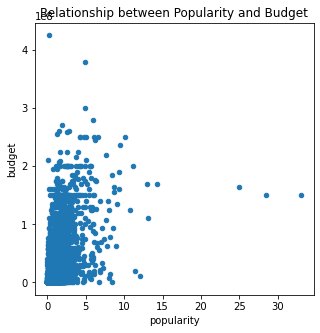

In [6]:
#relationship between popularity and budget
movies_df.plot(x='popularity', y='budget', kind='scatter' ,figsize=(5,5))
plt.title('Relationship between Popularity and Budget');

> it is obvious that there is a lot of clusters around the budget between 01e8 to to about 1.7e8 and between popularity of
0 to 5. there are some outliers due to very high data points of popularity like 25, 25.5 and 30. approximately,
also there is an outlier in the budget like 3.8 and above.
the relationship is more or less of a negative curvilinear relationship

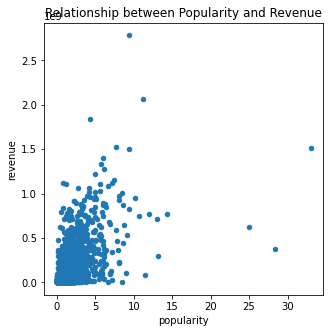

In [5]:
#relationship between popularity and revenue
movies_df.plot(x='popularity', y='revenue', kind='scatter' ,figsize=(5,5))
plt.title('Relationship between Popularity and Revenue');

> there are more concentrated clusters between popularity of 0 to 5 and revenue of 0.0 to 1.01e9.
the relationship is that of a positive curvilinear relationship.
there are also outliers that shows very high revenue at 2.0 upwards and high popularity at 25 upwards

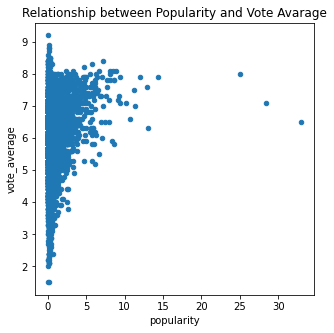

In [8]:
#relationship between popularity vote average
movies_df.plot(x='popularity', y='vote_average', kind='scatter' ,figsize=(5,5))
plt.title('Relationship between Popularity and Vote Avarage');

> this is more of a positive curvilinear relationship

#### Research Question 2 (what level of vote count receives the highest average revenue)

In [52]:
#get the min,nax,25%, 50%  and 75% to be able to convert quantitative column to categorical categorical columnn
movies_df.describe()

id    popularity        budget       revenue    vote_count  \
count   10865.000000  10865.000000  1.086500e+04  1.086500e+04  10865.000000   
mean    66066.374413      0.646446  1.462429e+07  3.982690e+07    217.399632   
std     92134.091971      1.000231  3.091428e+07  1.170083e+08    575.644627   
min         5.000000      0.000065  0.000000e+00  0.000000e+00     10.000000   
25%     10596.000000      0.207575  0.000000e+00  0.000000e+00     17.000000   
50%     20662.000000      0.383831  0.000000e+00  0.000000e+00     38.000000   
75%     75612.000000      0.713857  1.500000e+07  2.400000e+07    146.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09   9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count  10865.000000  10865.000000  1.086500e+04  1.086500e+04  
mean       5.975012   2001.321859  1.754989e+07  5.136900e+07  
std        0.935138     12.813260  3.430753e+07  1.446383e+08  
min        1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%        5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%        6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%        6.600000   2011.000000  2.085325e+07  3.370173e+07  
max        9.200000   2015.000000  4.250000e+08  2.827124e+09

In [10]:
#bin the edges that will be used to cut the data into groups
bin_edges=[10.000000,17.000000,38.000000,145.750000,9767.000000]

In [11]:
#labels for the four levels of vote count
bin_names=['High','Moderately High','Medium','Low']

In [12]:
#create vote count levels column and add it to the dataframe 
movies_df['Vote count levels']=pd.cut(movies_df['vote_count'], bin_edges, labels=bin_names)

In [13]:
#check for the vote count levels column created
movies_df['Vote count levels']

0                    Low
1                    Low
2                    Low
3                    Low
4                    Low
              ...       
10861               High
10862    Moderately High
10863               High
10864    Moderately High
10865               High
Name: Vote count levels, Length: 10866, dtype: category
Categories (4, object): ['High' < 'Moderately High' < 'Medium' < 'Low']

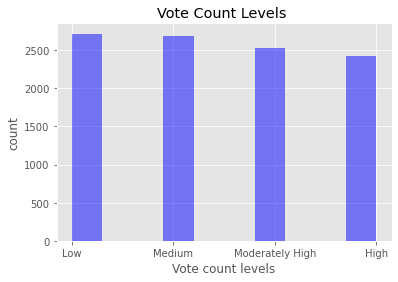

In [55]:
movies_df['Vote count levels'].hist(color='blue', alpha=0.5);
plt.title('Vote Count Levels ')
plt.xlabel('Vote count levels')
plt.ylabel('count');

> so the above visual shows us that low and medium vote count levels receives the highest revenue.

#### Research  question 3 (what level of the vote counts have the highest average revenue)

In [61]:
#check if the vote count levels column is adde
movies_df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                        runtime                                     genres  \
0 1970-01-01 00:00:00.000000124  Action|Adventure|Science Fiction|Thriller   
1 1970-01-01 00:00:00.000000120  Action|Adventure|Science Fiction|Thriller   
2 1970-01-01 00:00:00.000000119         Adventure|Science Fiction|Thriller   
3 1970-01-01 00:00:00.000000136   Action|Adventure|Science Fiction|Fantasy   
4 1970-01-01 00:00:00.000000137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj Vote count levels  
0           6.5          2015  1.379999e+08  1.392446e+09               Low  
1           7.1          2015  1.379999e+08  3.481613e+08               Low  
2           6.3          2015  1.012000e+08  2.716190e+08               Low  
3           7.5          2015  1.839999e+08  1.902723e+09               Low  
4           7.3          2015  1.747999e+08  1.385749e+09               Low

In [62]:
#find the mean average revenue of each vote count level by using group by
movies_df.groupby('Vote count levels')['revenue'].mean()

Vote count levels
High               1.236278e+06
Moderately High    2.988087e+06
Medium             1.434364e+07
Low                1.410063e+08
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Average revenue of each levels')

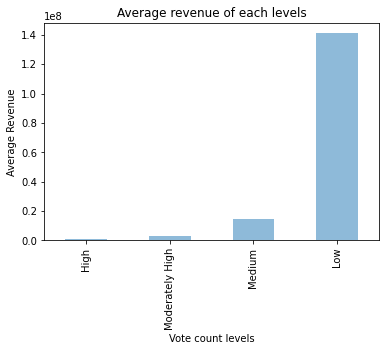

In [31]:
#using visuals to show more of the above analysis
movies_df.groupby('Vote count levels')['revenue'].mean().plot(kind='bar', alpha=.5);
plt.ylabel('Average Revenue')
plt.title('Average revenue of each levels')

> > so the above visual shows us that low and medium vote count levels receives the highest revenue.

#### Research question 4 ( Which genres are the oldest between Documentry and Horror)

In [64]:
#check the types of genres we have and put them in a dataframe
movies_df[['genres']]

genres
0      Action|Adventure|Science Fiction|Thriller
1      Action|Adventure|Science Fiction|Thriller
2             Adventure|Science Fiction|Thriller
3       Action|Adventure|Science Fiction|Fantasy
4                          Action|Crime|Thriller
...                                          ...
10861                                Documentary
10862                     Action|Adventure|Drama
10863                             Mystery|Comedy
10864                              Action|Comedy
10865                                     Horror

[10865 rows x 1 columns]

In [33]:
#create a datframe for Documentary genres
Doc_df=movies_df.query('genres == "Documentary" ' )


In [34]:
#check the genre to ensure it contains only documentary
Doc_df['genres']

241      Documentary
290      Documentary
334      Documentary
335      Documentary
346      Documentary
            ...     
10093    Documentary
10386    Documentary
10634    Documentary
10806    Documentary
10861    Documentary
Name: genres, Length: 312, dtype: object

In [35]:
# summary statistics of the  dataframe that contains documentary genre
Doc_df['release_year'].describe()

count     312.000000
mean     2009.291667
std         7.254771
min      1966.000000
25%      2008.000000
50%      2012.000000
75%      2014.000000
max      2015.000000
Name: release_year, dtype: float64

In [36]:
#create a datframe for Horror genres
Hor_df=movies_df.query('genres == "Horror"')


In [37]:
#check the genre to ensure it contains only Horror
Hor_df['genres']

87       Horror
98       Horror
199      Horror
224      Horror
292      Horror
          ...  
10781    Horror
10784    Horror
10808    Horror
10846    Horror
10865    Horror
Name: genres, Length: 253, dtype: object

In [38]:
# summary statistics of the  dataframe that contains Horror genre
Hor_df['release_year'].describe()

count     253.000000
mean     2000.517787
std        16.176012
min      1960.000000
25%      1989.000000
50%      2008.000000
75%      2013.000000
max      2015.000000
Name: release_year, dtype: float64

> the mean of the Documentary genre is greater than that of thr horror genre , hence is older than horror genre

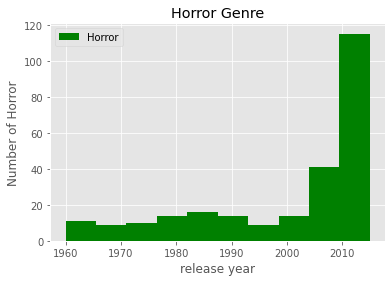

In [59]:
Hor_df['release_year'].hist(label='Horror', color='green');
plt.title('Horror Genre')
plt.xlabel('release year')
plt.ylabel('Number of Horror')
plt.style.use('ggplot')
plt.legend();

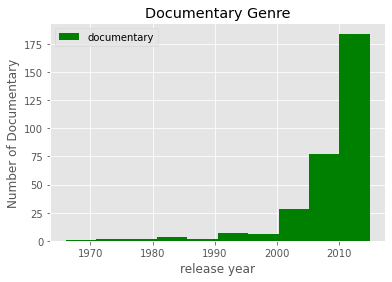

In [58]:
Doc_df['release_year'].hist(label='documentary', color='green');
plt.title('Documentary Genre')
plt.xlabel('release year')
plt.ylabel('Number of Documentary')
plt.style.use('ggplot')
plt.legend();

 > from the visual, the documentary genre is the oldest, also it is very skewed to the left just as the horror genre|

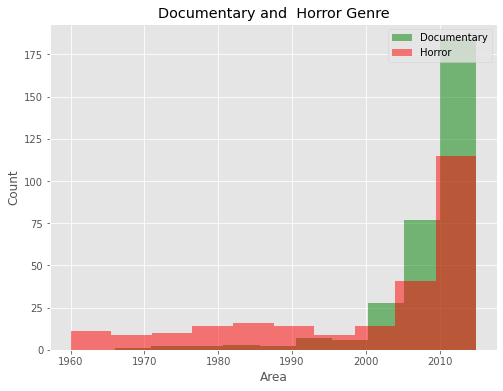

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize = (8, 6))
ax.hist(Doc_df['release_year'], alpha=0.5, label='Documentary', color='green')
ax.hist(Hor_df['release_year'], alpha=0.5, label='Horror', color='red')
ax.set_title('Documentary and  Horror Genre')
ax.set_xlabel('Area')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

> with this visual, it is more clearer

#### Research question 5(Which genres are the oldest between Action|Comedy and Mystery|Comedy)

In [44]:
#create a Mystery|Comedy dataframe
MC_df= movies_df.query('genres == "Mystery|Comedy"')

In [45]:
#create a Action|Comedy dataframe
AC_df= movies_df.query('genres == "Action|Comedy"')

In [46]:
#describe the year of release by doing a summary statistics on the  Action|Comedy dataframe
AC_df['release_year'].describe()

count      62.000000
mean     1997.983871
std        11.326007
min      1966.000000
25%      1990.250000
50%      2001.000000
75%      2007.750000
max      2014.000000
Name: release_year, dtype: float64

In [47]:
#describe the year of release by doing a summary statistics on the  Mystery|Comedy dataframe
MC_df['release_year'].describe()

count       2.000000
mean     1990.500000
std        34.648232
min      1966.000000
25%      1978.250000
50%      1990.500000
75%      2002.750000
max      2015.000000
Name: release_year, dtype: float64

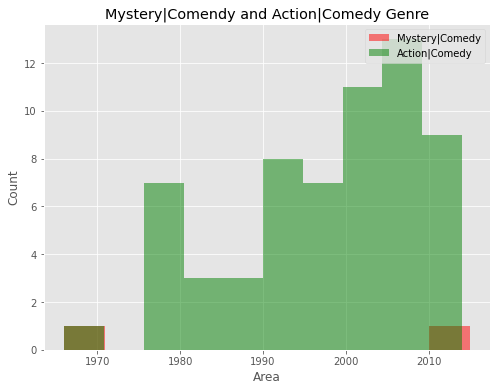

In [61]:
#use visuals to give a much better picture of the distribution of the release year of the two dataframes

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(8,6) )
ax.hist(MC_df['release_year'], alpha=0.5, label= 'Mystery|Comedy', color='red')
ax.hist(AC_df['release_year'], alpha=0.5, label='Action|Comedy', color='green')
ax.set_title('Mystery|Comendy and Action|Comedy Genre')
ax.set_xlabel('Area')
ax.set_ylabel('Count')
plt.legend(loc='upper right')
plt.show()


> from the summary statistics of both dataframes containing Mystery|Comedy and Action|Comedy genres,
the mean of  Action|Comedy genres is greater and the bar in the visual also shows it, hence it is the oldest

#### Research question 6 (How many genres generated more revenue)

In [101]:
#let us get the average revenue so we can divide the dataframes into two
mean=movies_df['revenue'].mean()
mean

39826896.07685228

In [102]:
#creating dataframe for generes with revenue greater than average revenue
high_rev_df=movies_df[movies_df['revenue'] > mean]
high_rev_df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                        runtime                                     genres  \
0 1970-01-01 00:00:00.000000124  Action|Adventure|Science Fiction|Thriller   
1 1970-01-01 00:00:00.000000120  Action|Adventure|Science Fiction|Thriller   
2 1970-01-01 00:00:00.000000119         Adventure|Science Fiction|Thriller   
3 1970-01-01 00:00:00.000000136   Action|Adventure|Science Fiction|Fantasy   
4 1970-01-01 00:00:00.000000137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj Vote count levels  
0           6.5          2015  1.379999e+08  1.392446e+09               Low  
1           7.1          2015  1.379999e+08  3.481613e+08               Low  
2           6.3          2015  1.012000e+08  2.716190e+08               Low  
3           7.5          2015  1.839999e+08  1.902723e+09               Low  
4           7.3          2015  1.747999e+08  1.385749e+09               Low

In [104]:
#creating dataframe for generes with revenue lower than average revenue
low_rev_df=movies_df[movies_df['revenue'] < mean]
low_rev_df.head()

id    imdb_id  popularity    budget   revenue original_title  \
12  264660  tt0470752    6.118847  15000000  36869414     Ex Machina   
30  280996  tt3168230    3.927333         0  29355203     Mr. Holmes   
35  264644  tt3170832    3.557846   6000000  35401758           Room   
36  339527  tt1291570    3.358321         0  22354572         Solace   
42  321697  tt2080374    3.079522  30000000  34441873     Steve Jobs   

                                                 cast          director  \
12  Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...      Alex Garland   
30  Ian McKellen|Milo Parker|Laura Linney|Hattie M...       Bill Condon   
35  Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...  Lenny Abrahamson   
36  Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...     Afonso Poyart   
42  Michael Fassbender|Kate Winslet|Seth Rogen|Kat...       Danny Boyle   

                                              tagline  \
12  There is nothing more human than the will to s...   
30                            The man behind the myth   
35                           Love knows no boundaries   
36  A serial killer who can see your future, a psy...   
42                             Based on a true story.   

                                             keywords  \
12  dancing|artificial intelligence|helicopter|dis...   
30                   london|detective|sherlock holmes   
35  based on novel|carpet|isolation|imprisonment|g...   
36  thriller|serial killer|psychic|fbi agent|intrigue   
42  biography|computer|based on true story|father ...   

                         runtime                 genres  \
12 1970-01-01 00:00:00.000000108  Drama|Science Fiction   
30 1970-01-01 00:00:00.000000103          Mystery|Drama   
35 1970-01-01 00:00:00.000000117         Drama|Thriller   
36 1970-01-01 00:00:00.000000101    Crime|Drama|Mystery   
42 1970-01-01 00:00:00.000000122          History|Drama   

                                 production_companies release_date  \
12  DNA Films|Universal Pictures International (UP...      1/21/15   
30  BBC Films|See-Saw Films|FilmNation Entertainme...      6/19/15   
35  Element Pictures|No Trace Camping|A24|Duperele...     10/16/15   
36  Eden Rock Media|FilmNation Entertainment|Flynn...       9/3/15   
42  Universal Pictures|Scott Rudin Productions|Leg...      10/9/15   

    vote_count  vote_average  release_year    budget_adj   revenue_adj  \
12        2854           7.6          2015  1.379999e+07  3.391985e+07   
30         425           6.4          2015  0.000000e+00  2.700677e+07   
35        1520           8.0          2015  5.519998e+06  3.256960e+07   
36         474           6.2          2015  0.000000e+00  2.056620e+07   
42        1035           6.9          2015  2.759999e+07  3.168651e+07   

   Vote count levels  
12               Low  
30               Low  
35               Low  
36               Low  
42               Low

In [105]:
#number of unique genres with higher revenue
high_rev_df['genres'].nunique()

743

In [106]:
#number of unique genres with lower revenue
low_rev_df['genres'].nunique()

1732

>  743 genres generated more revenue

#### Research question 7 (what impact did the budget have on some features)


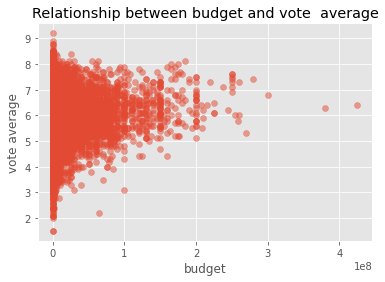

In [107]:
#plotting a scatter graph to show the relationship between budget and average vote
plt.scatter(movies_df['budget'], movies_df['vote_average'], alpha=.5)
plt.title('Relationship between budget and vote  average')
plt.xlabel('budget')
plt.ylabel('vote average')

plt.show()

> the visual above shows that there is no specific relationship or correlation between budget and vote average, hence it has no impact on average vote

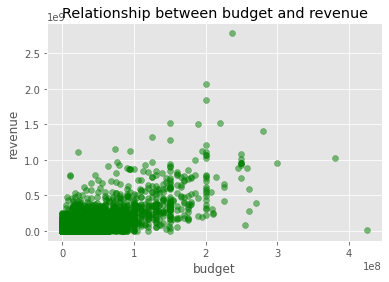

In [109]:
#plotting a scatter graph to show the relationship between budget and average vote
plt.scatter(movies_df['budget'], movies_df['revenue'], alpha=.5, color='green')
plt.title('Relationship between budget and revenue')
plt.xlabel('budget')
plt.ylabel('revenue')

plt.show()

> the above correlation is a positive one, which means that there is an increase in the revenue as the budget increases, although there are certain points where some some anomalies disobeyed this relationship.

#### Research question 8 (do movies with higher vote count  receive better popularity)

In [110]:
# get median of vote count so we can divide the dataframe into two
median=movies_df['vote_count'].median()
median

38.0

In [111]:
#movies with higher vote count
high_votecount=movies_df.query('vote_count > {}'.format(median))
high_votecount.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                        runtime                                     genres  \
0 1970-01-01 00:00:00.000000124  Action|Adventure|Science Fiction|Thriller   
1 1970-01-01 00:00:00.000000120  Action|Adventure|Science Fiction|Thriller   
2 1970-01-01 00:00:00.000000119         Adventure|Science Fiction|Thriller   
3 1970-01-01 00:00:00.000000136   Action|Adventure|Science Fiction|Fantasy   
4 1970-01-01 00:00:00.000000137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj Vote count levels  
0           6.5          2015  1.379999e+08  1.392446e+09               Low  
1           7.1          2015  1.379999e+08  3.481613e+08               Low  
2           6.3          2015  1.012000e+08  2.716190e+08               Low  
3           7.5          2015  1.839999e+08  1.902723e+09               Low  
4           7.3          2015  1.747999e+08  1.385749e+09               Low

In [112]:
#movies with lower vote count
low_votecount= movies_df.query('vote_count < {}'.format(median))
low_votecount.head()

id    imdb_id  popularity    budget  revenue  \
74   347096  tt3478232    2.165433         0        0   
92   370687  tt3608646    1.876037         0        0   
116  297291  tt3086386    1.380320         0        0   
143  378373  tt3532278    1.128081         0        0   
156  157843  tt1837636    0.973316  15000000        0   

                         original_title  \
74               Mythica: The Darkspore   
92             Mythica: The Necromancer   
116  The Scorpion King: The Lost Throne   
143                Brothers of the Wind   
156                 Queen of the Desert   

                                                  cast  \
74   Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...   
92   Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...   
116  Victor Webster|Ellen Hollman|Barry Bostwick|Wi...   
143   Manuel Camacho|Jean Reno|Tobias Moretti|Eva Kuen   
156  Nicole Kidman|James Franco|Robert Pattinson|Da...   

                         director                               tagline  \
74                  Anne K. Black                Based on a true story.   
92                  A. Todd Smith                Based on a true story.   
116                  Mike Elliott                      Action Adventure   
143  Gerado Olivares|Otmar Penker  Sometimes a friendship sets you free   
156                 Werner Herzog                Based on a true story.   

                                              keywords  \
74      sword|magic|sorcery|necromancer|woman director   
92                     sword|magic|sorcery|necromancer   
116                     magic|fantasy|steampunk|dragon   
143  eagle|learning to fly|eagle's feather|father s...   
156                      middle east|persia|adventurer   

                          runtime                    genres  \
74  1970-01-01 00:00:00.000000108  Action|Adventure|Fantasy   
92  1970-01-01 00:00:00.000000000  Fantasy|Action|Adventure   
116 1970-01-01 00:00:00.000000105  Action|Fantasy|Adventure   
143 1970-01-01 00:00:00.000000098    Adventure|Drama|Family   
156 1970-01-01 00:00:00.000000128             Drama|History   

                                  production_companies release_date  \
74                            Arrowstorm Entertainment      6/24/15   
92   Arrowstorm Entertainment|Camera 40 Productions...     12/19/15   
116                                 Universal Pictures       1/9/15   
143                        Terra Mater Factual Studios     12/24/15   
156  Benaroya Pictures|H Films|Raslan Company of Am...       9/3/15   

     vote_count  vote_average  release_year    budget_adj  revenue_adj  \
74           27           5.1          2015  0.000000e+00          0.0   
92           11           5.4          2015  0.000000e+00          0.0   
116          22           4.5          2015  0.000000e+00          0.0   
143          11           7.5          2015  0.000000e+00          0.0   
156          30           6.0          2015  1.379999e+07          0.0   

    Vote count levels  
74    Moderately High  
92               High  
116   Moderately High  
143              High  
156   Moderately High

In [113]:
# group the mean of each column in the dataframe by popularity
high_votecount.groupby('popularity').mean()

id       budget       revenue  vote_count  vote_average  \
popularity                                                                  
0.000620    174323.0          0.0  0.000000e+00        82.0           6.1   
0.010335    203793.0   30000000.0  6.812952e+07        64.0           5.5   
0.012003     17630.0          0.0  0.000000e+00        44.0           5.5   
0.015247    225703.0    4500000.0  0.000000e+00       151.0           4.1   
0.015310    253835.0          0.0  0.000000e+00        42.0           5.9   
...              ...          ...           ...         ...           ...   
13.112507   262500.0  110000000.0  2.952382e+08      2480.0           6.3   
14.311205   118340.0  170000000.0  7.733124e+08      5612.0           7.9   
24.949134   157336.0  165000000.0  6.217525e+08      6498.0           8.0   
28.419936    76341.0  150000000.0  3.784364e+08      6185.0           7.1   
32.985763   135397.0  150000000.0  1.513529e+09      5562.0           6.5   

            release_year    budget_adj   revenue_adj  
popularity                                            
0.000620          2013.0  0.000000e+00  0.000000e+00  
0.010335          2013.0  2.808100e+07  6.377150e+07  
0.012003          2008.0  0.000000e+00  0.000000e+00  
0.015247          2013.0  4.212150e+06  0.000000e+00  
0.015310          2009.0  0.000000e+00  0.000000e+00  
...                  ...           ...           ...  
13.112507         2015.0  1.012000e+08  2.716190e+08  
14.311205         2014.0  1.565855e+08  7.122911e+08  
24.949134         2014.0  1.519800e+08  5.726906e+08  
28.419936         2015.0  1.379999e+08  3.481613e+08  
32.985763         2015.0  1.379999e+08  1.392446e+09  

[5401 rows x 8 columns]

In [114]:
# group the mean of each column in the dataframe by popularity
low_votecount.groupby('popularity').mean()

id     budget    revenue  vote_count  vote_average  \
popularity                                                             
0.000065     18729.0        0.0        0.0        17.0           6.0   
0.000188     32082.0        0.0        0.0        10.0           6.4   
0.000973     31329.0        0.0        0.0        13.0           5.7   
0.001115     15412.0        0.0        0.0        10.0           6.8   
0.001117      1392.0   350000.0  3515061.0        23.0           6.4   
...              ...        ...        ...         ...           ...   
2.078514    321068.0        0.0        0.0        29.0           5.3   
2.165433    347096.0        0.0        0.0        27.0           5.1   
2.407266     25571.0  3500000.0        0.0        10.0           6.3   
6.668990     13590.0        0.0        0.0        11.0           5.5   
8.411577    161337.0        0.0        0.0        21.0           5.9   

            release_year    budget_adj   revenue_adj  
popularity                                            
0.000065          1985.0  0.000000e+00  0.000000e+00  
0.000188          1971.0  0.000000e+00  0.000000e+00  
0.000973          2005.0  0.000000e+00  0.000000e+00  
0.001115          2006.0  0.000000e+00  0.000000e+00  
0.001117          2004.0  4.040559e+05  4.057946e+06  
...                  ...           ...           ...  
2.078514          2014.0  0.000000e+00  0.000000e+00  
2.165433          2015.0  0.000000e+00  0.000000e+00  
2.407266          1997.0  4.754611e+06  0.000000e+00  
6.668990          1997.0  0.000000e+00  0.000000e+00  
8.411577          2011.0  0.000000e+00  0.000000e+00  

[5367 rows x 8 columns]

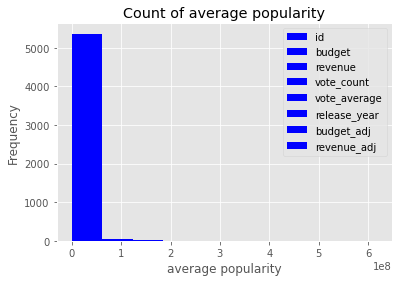

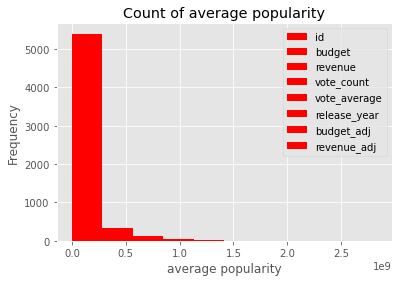

In [119]:
low_votecount.groupby('popularity').mean().plot(kind='hist', label='low', color='blue')
plt.title('Count of average popularity')
plt.xlabel('average popularity')
plt.legend()
high_votecount.groupby('popularity').mean().plot(kind='hist', label='high', color='red')
plt.title('Count of average popularity')
plt.xlabel('average popularity')
plt.legend();

> from the results of the summary statistics and visuals , it shows that movies with higher vote counts have better popularity

<a id='conclusions'></a>
## Conclusions

> Finally, i have successfully cleaned and do necessary EDA to the **TMDB MOVIES** data.
from all the analysis above, i am concluding that the budget for movies and revenue are positively correlated, hence, as budget inceases, revenue increases.
Also, some movies have better popularity while some do not, those with higher popularity are those who got higher vote count, so i can infer from here that there was no biasness in the process of voting.
more so, budget and average vote for each movie have no relationship.
In addition, 743 genres generated more revenue out of 2039 genres.
some of the genres are also odler than each other, just like it is analysed and shown that the documentary genre is older than the horror genre

## Limitations

> A few factors would have caused a great effect on the result of this analysis.  Some missing values were present in some
columns which i had to deal with by filling the missing values up with appropriate mean, beacuse if this was not corrected it will have a bad effect on the revenue generated by each movie and how to know what budget to make, more so it will affcet the eventual result if not dealt with. Another possible limitaion in this dataset was the runtime whose data type would have lead to a wrong prediction beacuse i believe time should be in either timestamp or any other time data type, hence i had to convert its data type appropriately so that when visualizing, i can get a better analysis that showed me how the run time of each movies is related to some features.




<a id='conclusions'></a>
## References

> Udacity classrrom, stack overflow